# LUCAS-KANADE ALGORITHM 

Extract Two Frames from the target video


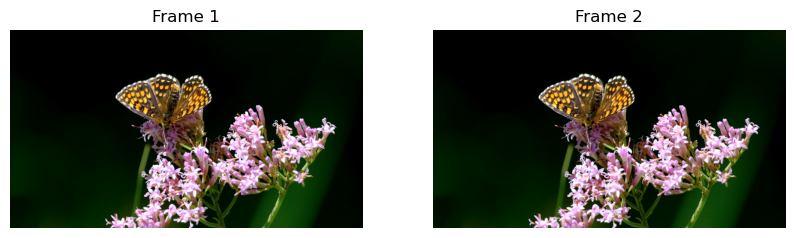

In [14]:
import cv2
import matplotlib.pyplot as plt

video_path = r"C:\Users\student\Downloads\13205231_1920_1080_24fps.mp4" 
cap = cv2.VideoCapture(video_path)

ret1, frame1 = cap.read()
ret2, frame2 = cap.read()

cap.release()

if ret1 and ret2:
    frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
    frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(frame1)
    plt.title("Frame 1")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(frame2)
    plt.title("Frame 2")
    plt.axis("off")

    plt.show()
else:
    print("Error: Could not read frames from video.")


Detection of Optical Flow between two frames

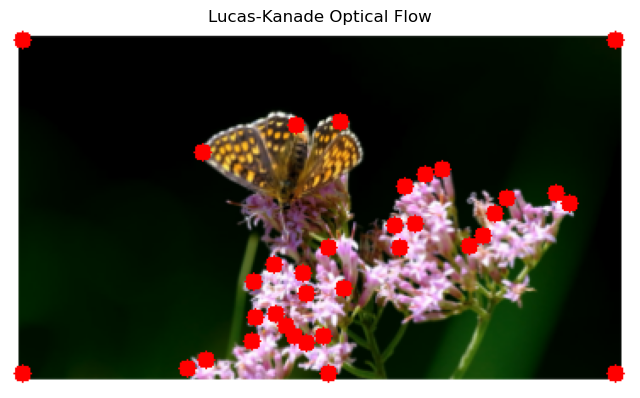

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

frame1 = cv2.imread(r"C:\Users\student\Pictures\Screenshots\frame1.png")
frame2 = cv2.imread(r"C:\Users\student\Pictures\Screenshots\frame2.png")

if frame1 is None or frame2 is None:
    print("Error: Could not load frames.")
    exit()

frame2 = cv2.resize(frame2, (frame1.shape[1], frame1.shape[0]))

gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

p0 = cv2.goodFeaturesToTrack(gray1, mask=None, **feature_params)

if p0 is None:
    print("No good features found in frame1.")
    exit()

lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

if p1 is not None and st is not None:
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        frame2 = cv2.line(frame2, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
        frame2 = cv2.circle(frame2, (int(a), int(b)), 5, (0, 0, 255), -1)

    frame2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(frame2_rgb)
    plt.title("Lucas-Kanade Optical Flow")
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print("Optical flow could not be calculated.")


In [20]:
import cv2
import numpy as np

video_path = r"C:\Users\student\Downloads\13205231_1920_1080_24fps.mp4" 
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

ret, old_frame = cap.read()
if not ret:
    print("Error: Could not read first frame.")
    exit()

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

feature_params = dict(maxCorners=200, qualityLevel=0.3, minDistance=7, blockSize=7)

p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

mask = np.zeros_like(old_frame)

while cap.isOpened():
    ret, new_frame = cap.read()
    if not ret:
        break  

    new_gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)

    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, new_gray, p0, None, **lk_params)

    if p1 is not None and st is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            new_frame = cv2.circle(new_frame, (int(a), int(b)), 5, (0, 0, 255), -1)

        output = cv2.add(new_frame, mask)

        cv2.imshow('Optical Flow - Lucas Kanade', output)

        old_gray = new_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()
